In [1]:
import urllib
import cStringIO
from PIL import Image
import pandas as pd
from dateutil import parser as dateParser
import seaborn as sns
from seaborn import plt
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("r10_dump_with_extra_info.csv")

In [6]:
df.info()
df[['device','content_type','agg_level','flash_on','lux','proximity']].head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17902 entries, 0 to 17901
Data columns (total 19 columns):
id                              17902 non-null object
dumpster                        17902 non-null object
device                          17902 non-null object
content_type                    17902 non-null object
timestamp                       17902 non-null object
agg_level                       17272 non-null float64
agg_camera_blocked              17611 non-null float64
classifciation_count_for_agg    17800 non-null float64
min_classification_for_agg      17313 non-null float64
max_classification_for_agg      17313 non-null float64
agg_values_are_compology        17800 non-null float64
compology_audit_level           1 non-null float64
compology_cam_is_blocked        0 non-null float64
adjusted_level                  17340 non-null float64
flash_on                        17902 non-null int64
lux                             17902 non-null float64
pre_empty                 

,device,content_type,agg_level,flash_on,lux,proximity
0,370034000247333233373438,cardboard,88,1,0.100,13.305
1,260040000247333233373438,recycling,78,0,10.588,1.183
2,3B002E000147333233373438,landfill,2,1,0.000,0.138


In [7]:
df['rounded_level'] = df.agg_level.apply(lambda x: round(x,-1))
df['timestamp'] = df.timestamp.apply(dateParser.parse)

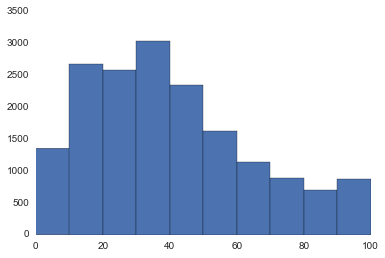

In [8]:
df.rounded_level.hist(bins=10)

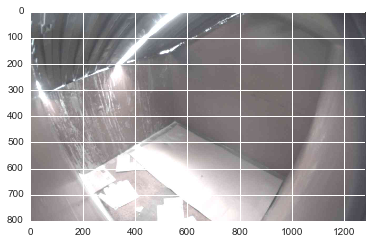

In [9]:
fileURL = df.img[30]
f = urllib.urlopen(fileURL)
img = cStringIO.StringIO(f.read())
imgBase = Image.open(img)

imshow(np.asarray(imgBase))

In [10]:
print "Length of pixel array: {:,d}".format(len(imgBase.getdata()))
print imgBase.size
print
print list(imgBase.getdata())[:1000]

Length of pixel array: 1,024,000
(1280, 800)

[(155, 154, 162), (157, 156, 164), (154, 153, 161), (142, 142, 150), (127, 127, 135), (114, 117, 124), (110, 115, 121), (111, 116, 122), (105, 112, 118), (103, 110, 116), (100, 109, 114), (97, 108, 112), (97, 108, 112), (97, 111, 114), (99, 113, 116), (101, 115, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (107, 112, 118), (109, 114, 120), (113, 118, 124), (118, 123, 129), (123, 128, 134), (126, 131, 137), (131, 136, 142), (132, 137, 143), (132, 137, 143), (131, 136, 142), (129, 134, 140), (125, 130, 136), (121, 126, 132), (118, 123, 129), (118, 123, 129), (122, 127, 133), (125, 130, 136), (127, 132, 138), (131, 136, 142), (142, 147, 153), (160, 165, 171), (173, 178, 184), (178,

In [12]:
for sizer in [1,2,4,8,16]:
    f = urllib.urlopen(fileURL)
    img = cStringIO.StringIO(f.read())
    imgBase = Image.open(img)

    newSize = tuple([x/sizer for x in imgBase.size])
    img = imgBase.resize(newSize)
    print "Figure dimensions:  {:s}  | pixel length: {:,d}".format(str(img.size),len(list(img.getdata())))
#     imshow(np.asarray(img))
    

Figure dimensions:  (1280, 800)  | pixel length: 1,024,000
Figure dimensions:  (640, 400)  | pixel length: 256,000
Figure dimensions:  (320, 200)  | pixel length: 64,000
Figure dimensions:  (160, 100)  | pixel length: 16,000
Figure dimensions:  (80, 50)  | pixel length: 4,000


In [ ]:
STANDARD_SIZE = (128,80)
def pixelResizer(x):
    return np.asarray(x.resize(STANDARD_SIZE))

img.